<a href="https://colab.research.google.com/github/GiriSrinivasan/Power-Plant-Data-Analysis/blob/main/Power_Plant__Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('C:/Data Science/Case Studies/Power Plant Data Analysis/Power Plant Data Analysis/train.csv', delimiter=',')
data.head(10)

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38
5,26.82,69.23,1013.28,50.86,436.36
6,9.48,40.80,1023.82,78.98,485.36
7,9.41,41.54,1019.48,82.19,481.59
8,31.03,69.59,1007.77,63.96,432.56
9,18.24,59.15,1012.00,84.40,449.48


In [ ]:
data.shape

(7176, 5)

In [ ]:
y_train = data[' EP']

In [ ]:
del data[' EP']

In [ ]:
data.head()

,# T,V,AP,RH
0,8.58,38.38,1021.03,84.37
1,21.79,58.20,1017.21,66.74
2,16.64,48.92,1011.55,78.76
3,31.38,71.32,1009.17,60.42
4,9.20,40.03,1017.05,92.46


In [ ]:
y_train.head()

0    482.26
1    446.94
2    452.56
3    433.44
4    480.38
Name:  EP, dtype: float64

In [ ]:
data.describe()

,# T,V,AP,RH
count,7176.000000,7176.000000,7176.000000,7176.000000
mean,19.629712,54.288154,1013.263032,73.275818
std,7.475256,12.751468,5.964863,14.625093
min,1.810000,25.360000,992.890000,25.560000
25%,13.470000,41.740000,1009.010000,63.202500
50%,20.315000,52.050000,1012.910000,74.895000
75%,25.720000,66.540000,1017.302500,84.925000
max,35.770000,81.560000,1033.300000,100.160000


In [ ]:
data.isnull().sum()  # checking for missing values

# T    0
 V     0
 AP    0
 RH    0
dtype: int64

## EDA

In [ ]:
# statistics part
min_EP = np.min(y_train)  # Min EP
max_EP = np.max(y_train)
mean_EP = np.mean(y_train)
median_EP = np.median(y_train)
std_EP = np.std(y_train)

first_quartile = np.percentile(y_train, 25)
third_quartile = np.percentile(y_train, 75)
inter_quartile = third_quartile - first_quartile

In [ ]:
print('Statistics of Combined Cycle of Power Plant')
print('Minimum of EP:', min_EP)
print('Maximum of EP:', max_EP)
print('Mean of EP:', mean_EP)
print('Median of EP:', median_EP)
print('Standard Deviation of EP:', std_EP)

print('First Quartile of EP:', first_quartile)
print('Third Quartile of EP:', third_quartile)
print('Inter Quartile of EP:',inter_quartile)

Statistics of Combined Cycle of Power Plant
Minimum of EP: 420.26
Maximum of EP: 495.76
Mean of EP: 454.43129319955347
Median of EP: 451.74
Standard Deviation of EP: 17.13337725345268
First Quartile of EP: 439.7375
Third Quartile of EP: 468.6675
Inter Quartile of EP: 28.930000000000007


C:\Users\Giridharan.S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


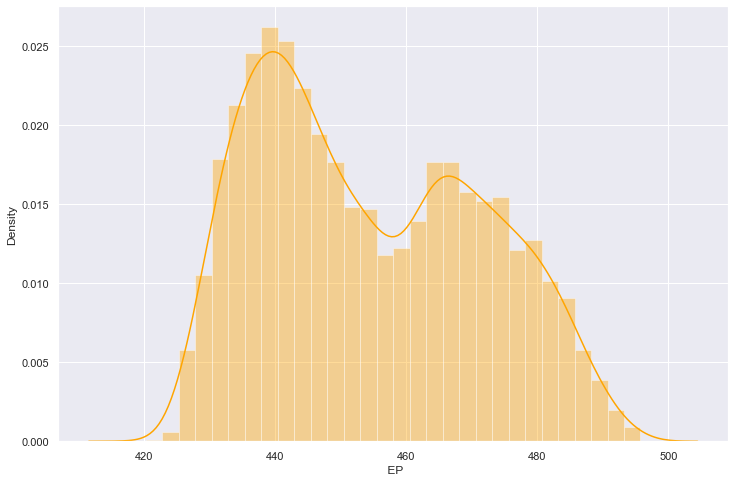

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(y_train, bins=30, color='orange')
plt.show()

## Correlation


In [ ]:
corr_df = data.copy()
corr_df['EP'] = y_train
corr_df.head(10)

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38
5,26.82,69.23,1013.28,50.86,436.36
6,9.48,40.80,1023.82,78.98,485.36
7,9.41,41.54,1019.48,82.19,481.59
8,31.03,69.59,1007.77,63.96,432.56
9,18.24,59.15,1012.00,84.40,449.48


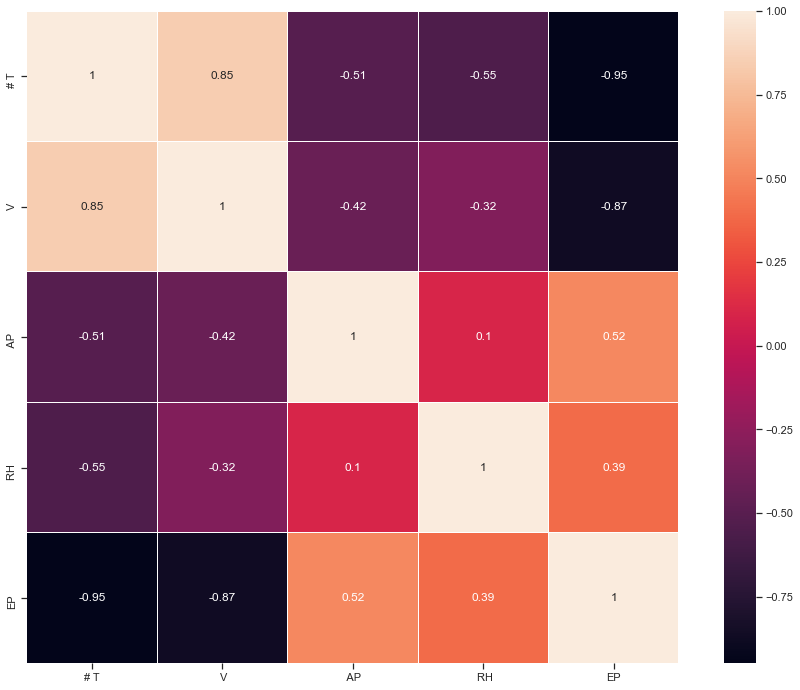

In [ ]:
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(16,12))
sns.heatmap(corr_df.astype('float32').corr(), linewidths=0.1, square=True, annot=True)
plt.show()

## Feature Plots

In [ ]:
data.columns

Index(['# T', ' V', ' AP', ' RH'], dtype='object')

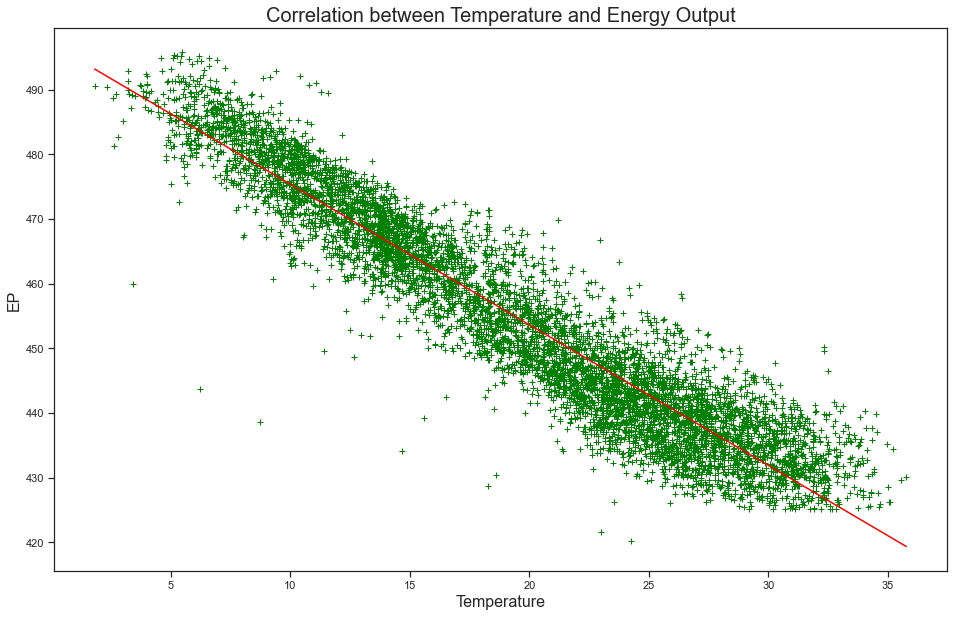

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(corr_df['# T'],corr_df['EP'], '+', color='green')
plt.plot(np.unique(corr_df['# T']), np.poly1d(np.polyfit(corr_df['# T'],corr_df['EP'], 1))(np.unique(corr_df['# T'])), color='red')
plt.title('Correlation between Temperature and Energy Output', fontsize=20)
plt.xlabel('Temperature', fontsize=16)
plt.ylabel('EP', fontsize=16)
plt.show()

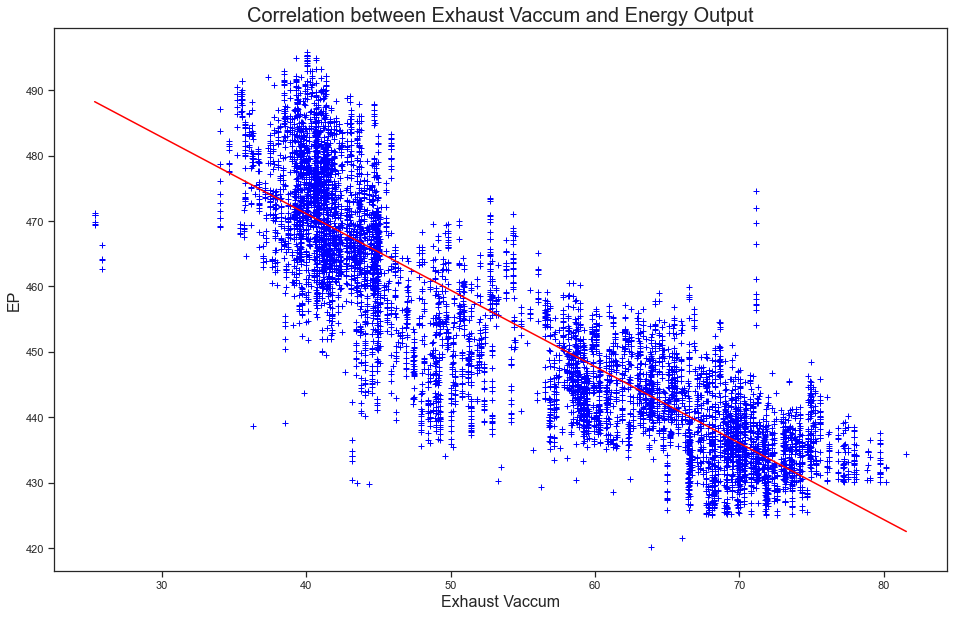

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(corr_df[' V'],corr_df['EP'], '+', color='blue')
plt.plot(np.unique(corr_df[' V']), np.poly1d(np.polyfit(corr_df[' V'],corr_df['EP'], 1))(np.unique(corr_df[' V'])), color='red')
plt.title('Correlation between Exhaust Vaccum and Energy Output', fontsize=20)
plt.xlabel('Exhaust Vaccum', fontsize=16)
plt.ylabel('EP', fontsize=16)
plt.show()

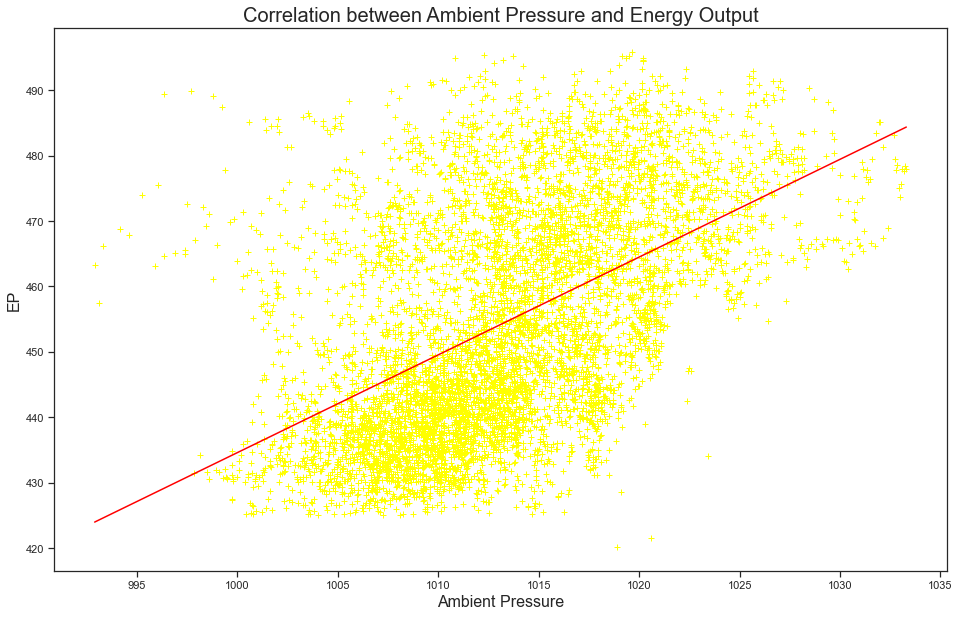

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(corr_df[' AP'],corr_df['EP'], '+', color='yellow')
plt.plot(np.unique(corr_df[' AP']), np.poly1d(np.polyfit(corr_df[' AP'],corr_df['EP'], 1))(np.unique(corr_df[' AP'])), color='red')
plt.title('Correlation between Ambient Pressure and Energy Output', fontsize=20)
plt.xlabel('Ambient Pressure', fontsize=16)
plt.ylabel('EP', fontsize=16)
plt.show()

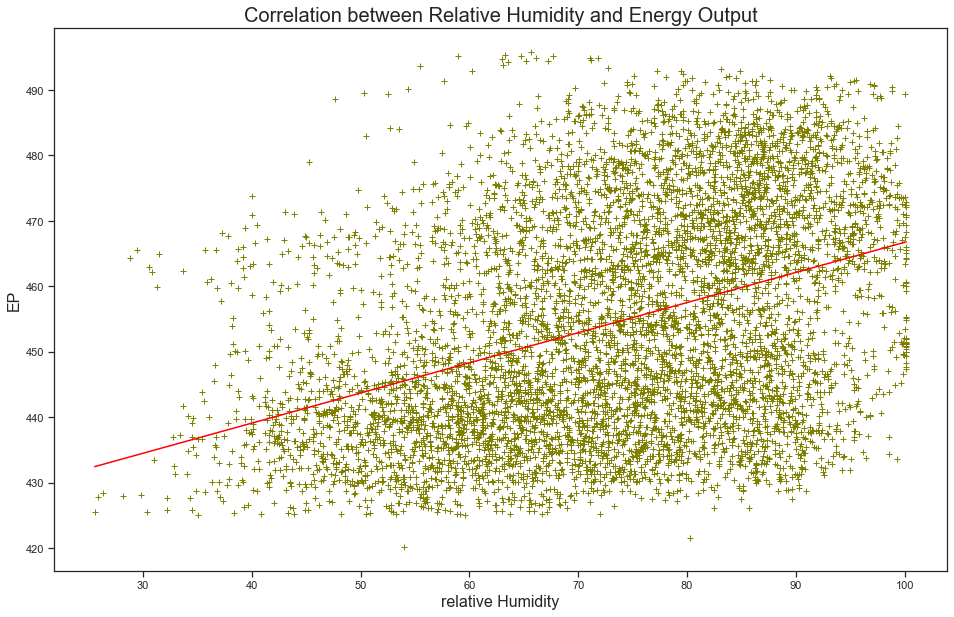

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(corr_df[' RH'],corr_df['EP'], '+', color='olive')
plt.plot(np.unique(corr_df[' RH']), np.poly1d(np.polyfit(corr_df[' RH'],corr_df['EP'], 1))(np.unique(corr_df[' RH'])), color='red')
plt.title('Correlation between Relative Humidity and Energy Output', fontsize=20)
plt.xlabel('relative Humidity', fontsize=16)
plt.ylabel('EP', fontsize=16)
plt.show()

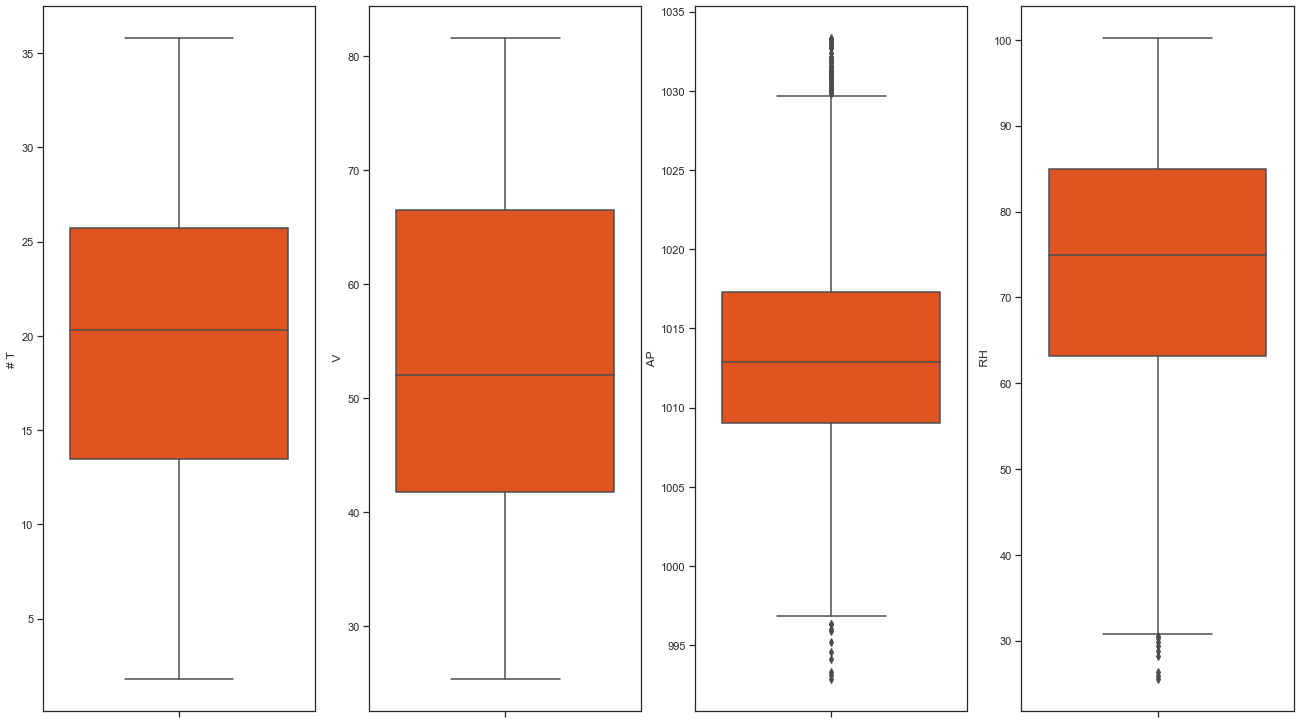

In [ ]:
fig, axs=plt.subplots(ncols=4, nrows=1, figsize=(18,10))
index=0
axs = axs.flatten()

for i,v in data.items():
    sns.boxplot(y=i, data=data, ax=axs[index], color='orangered')
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)

<Figure size 1296x720 with 0 Axes>

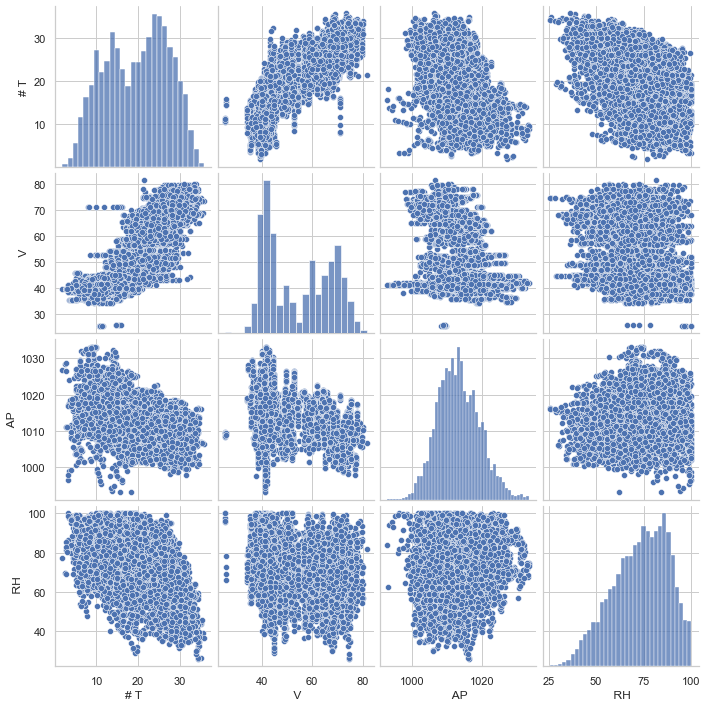

In [ ]:
plt.figure(figsize=(18,10))
sns.set(style='whitegrid')
features_plot = data.columns

sns.pairplot(data[features_plot]);
plt.tight_layout
plt.show()

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.47827466e+00, -1.24764165e+00,  1.30221067e+00,
         7.58624590e-01],
       [ 2.89012041e-01,  3.06797549e-01,  6.61749044e-01,
        -4.46921842e-01],
       [-3.99975582e-01, -4.21012529e-01, -2.87207194e-01,
         3.75010552e-01],
       ...,
       [ 1.36062192e+00,  1.18048335e+00, -6.54382840e-01,
        -5.83682640e-01],
       [-4.36097263e-01,  9.29089763e-04,  7.84140927e-01,
        -6.59584883e-01],
       [ 1.40209496e+00,  6.07960340e-01, -4.31394890e-01,
        -1.73110573e+00]])

# Model Building - Gradient Descent  

In [ ]:
x_train = data

In [ ]:
x_train.shape, y_train.shape

((7176, 4), (7176,))

In [ ]:
# importing the library for Ml
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate=1.9, n_estimators=2000)
gbr

GradientBoostingRegressor(learning_rate=1.9, n_estimators=2000)

In [ ]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=1.9, n_estimators=2000)

In [ ]:
# prediction
x_test = np.genfromtxt('C:/Data Science/Case Studies/Power Plant Data Analysis/Power Plant Data Analysis/test.csv',delimiter=',')
y_train.ravel(order='A')

y_pred = gbr.predict(x_test)

In [ ]:
y_pred

array([472.48543507, 461.71928633, 434.22314744, ..., 443.59570999,
       457.24078238, 443.65087566])

## Model Evalution

In [ ]:
gbr.score(x_train,y_train)

0.9985409934078529

In [ ]:
np.savetxt('Predict.csv',y_pred,fmt='%.5f')